# Perceptron
## 1. Single layer perceptron
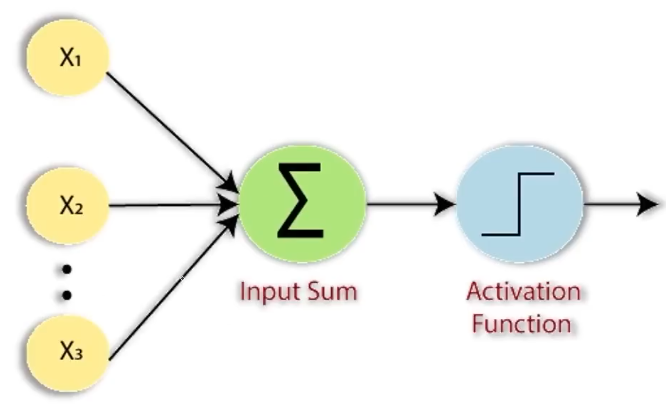

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('../dataset/placement.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    100 non-null    float64
 1   score   100 non-null    float64
 2   placed  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


,cgpa,score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


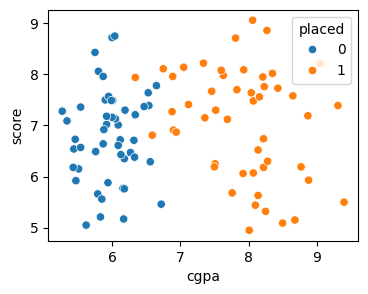

In [16]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='cgpa',y='score',data=df,hue='placed')
plt.show()

In [17]:
x = df.iloc[:,:-1]
y = df['placed']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [27]:
from sklearn.linear_model import Perceptron

In [37]:
pr = Perceptron()
pr.fit(x_train, y_train)

Perceptron()

In [38]:
pr.score(x_train, y_train), pr.score(x_test, y_test)

(0.775, 0.75)

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


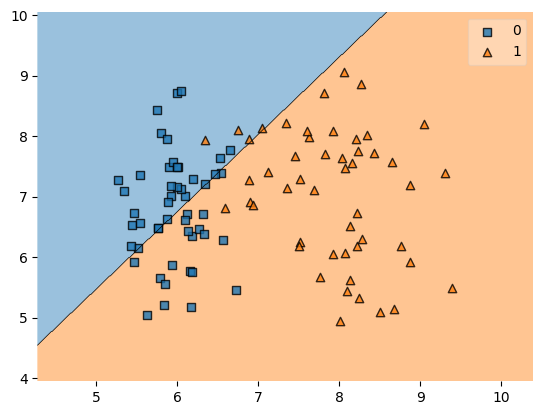

In [39]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=pr)
plt.show()

## 2. Multilayer perceptron or Artificial Neural Network
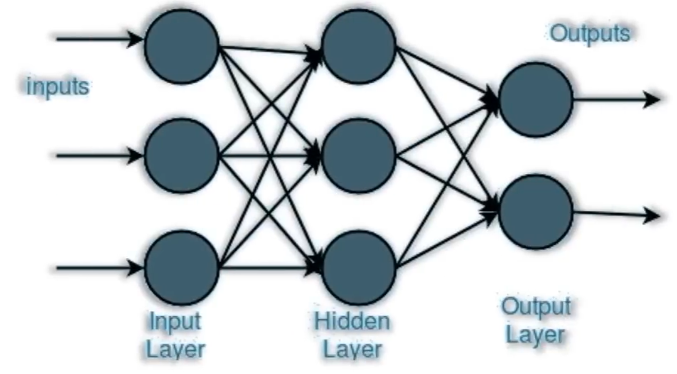

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [5]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

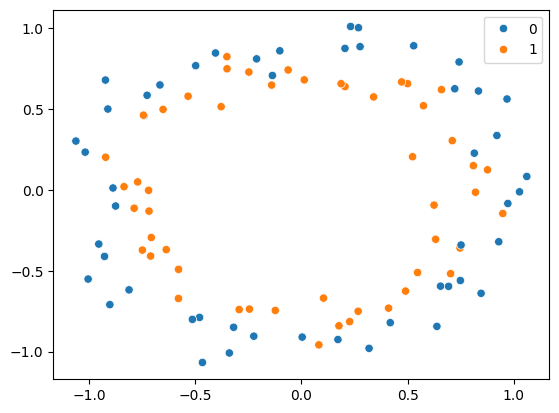

In [12]:
sns.scatterplot(x=x[:,0],y=x[:,1], hue=y)
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, verbose=0)

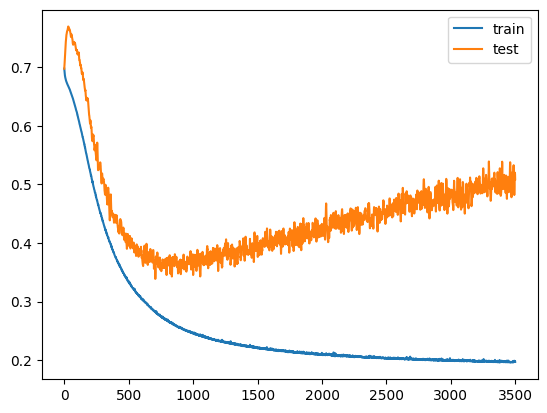

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 775us/step


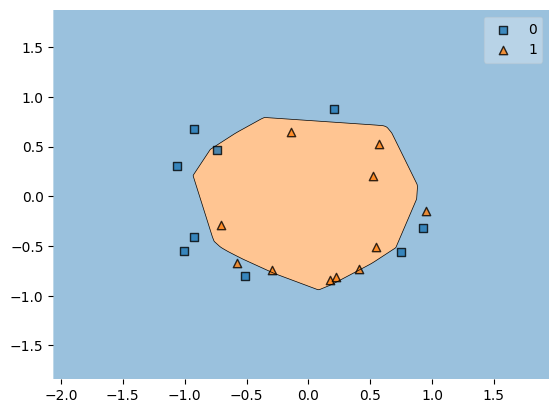

In [21]:
plot_decision_regions(x_test, y_test, clf=model)
plt.show()